In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
sat_df = pd.read_csv('/Users/elijahflomen/Desktop/Capstone/data/satData.csv')
prof_df = pd.read_csv('/Users/elijahflomen/Desktop/Capstone/data/profileData.csv')

In [3]:
print("sat_df shape: ", sat_df.shape)
print("prof_df shape: ", prof_df.shape)

sat_df shape:  (66271, 15)
prof_df shape:  (37469410, 8)


In [4]:
print("The sat_df has columns: ", sat_df.columns.to_list(), '\n')
print("The prof_df has columns: ", prof_df.columns.to_list())

The sat_df has columns:  ['float', 'cycleNumber', 'date', 'latitude', 'longitude', 'elevation', 'MO_SAT_SST', 'MO_SAT_CHL', 'MO_SAT_BBP', 'LT_SAT_SST_SD', 'LT_SAT_SST_MED', 'LT_SAT_CHL_SD', 'LT_SAT_CHL_MED', 'LT_SAT_BBP_SD', 'LT_SAT_BBP_MED'] 

The prof_df has columns:  ['float', 'cycleNumber', 'date', 'PRES', 'PSAL', 'TEMP', 'BBP700', 'CHLA']


In [5]:
print("sat_df summary:")
sat_df[["latitude", "longitude", "elevation", "MO_SAT_SST", "MO_SAT_CHL", "MO_SAT_BBP", "LT_SAT_SST_SD", "LT_SAT_SST_MED", "LT_SAT_CHL_SD", "LT_SAT_CHL_MED", "LT_SAT_BBP_SD", "LT_SAT_BBP_MED"]].describe()

sat_df summary:


,latitude,longitude,elevation,MO_SAT_SST,MO_SAT_CHL,MO_SAT_BBP,LT_SAT_SST_SD,LT_SAT_SST_MED,LT_SAT_CHL_SD,LT_SAT_CHL_MED,LT_SAT_BBP_SD,LT_SAT_BBP_MED
count,66271.000000,66271.000000,66271.000000,62358.000000,52921.000000,52760.000000,62993.000000,62994.000000,66267.000000,62991.000000,62990.000000,62991.000000
mean,-0.981837,-7.592350,-3665.266738,15.288537,0.281664,0.002158,1.953527,14.493915,0.235511,0.224843,0.000734,0.002111
std,44.806916,87.992165,1228.480262,9.859002,0.476795,0.001084,1.086169,9.936941,0.421947,0.163730,0.000525,0.000548
min,-75.647000,-179.985000,-9614.000000,-1.795000,0.013924,0.000025,0.050174,-1.437765,0.005115,0.023332,0.000143,0.001001
25%,-46.785919,-58.094193,-4599.500000,5.990036,0.098681,0.001567,1.128703,5.122558,0.043225,0.115741,0.000300,0.001666
50%,2.052000,-0.267000,-3718.000000,15.065931,0.164445,0.001853,1.636134,14.610808,0.094509,0.167172,0.000634,0.002059
75%,37.963248,62.413668,-2824.000000,25.303648,0.303834,0.002435,2.359440,24.605392,0.261495,0.291491,0.001003,0.002466
max,78.759000,179.991000,-54.000000,32.682278,22.891980,0.025816,6.178847,30.563904,10.075015,1.497630,0.010815,0.005746


In [6]:
print("prof_df summary:")
prof_df[["PRES", "PSAL", "TEMP", "BBP700", "CHLA"]].describe()

prof_df summary:


,PRES,PSAL,TEMP,BBP700,CHLA
count,3.746941e+07,3.660242e+07,3.745701e+07,3.721008e+07,3.723590e+07
mean,4.312198e+02,3.526833e+01,8.318618e+00,6.421931e-04,6.600038e-02
std,2.898204e+02,1.505313e+00,6.720189e+00,3.473924e-03,2.394648e-01
min,0.000000e+00,1.628877e+01,-1.860345e+00,-7.762093e-04,-1.569500e-01
25%,1.760000e+02,3.439201e+01,2.825333e+00,2.632409e-04,3.671831e-17
50%,3.850000e+02,3.473279e+01,6.232000e+00,3.382371e-04,4.800000e-03
75%,6.800000e+02,3.525596e+01,1.343230e+01,4.639434e-04,3.240000e-02
max,1.119000e+03,4.072763e+01,3.204117e+01,8.411027e-02,2.136333e+01


In [7]:
print(f"The prof_df has {len(prof_df['float'].unique())} unique floats, yet sattelite has {sat_df.shape[0]} records")
print("Mapping these one to one implies a large deal of interpolation")

The prof_df has 569 unique floats, yet sattelite has 66271 records
Mapping these one to one implies a large deal of interpolation


Mapping satteliate data to float data on a one to one basis implies a large deal of interpolation. Lets see how far off we are on avg. distance wise between sattelite and float measurement (using euclidean dist between long. and lat)

In [8]:
# shortest_dists = []
# for s in sat_df.index:
#     curr_shortest_dist = np.inf
#     sat_dists = []
#     for p in prof_df.index:
#         s_lat = sat_df.loc[s, "latitude"]
#         s_long = sat_df.loc[s, "longitude"]
#         p_lat = prof_df.loc[p, 'latitude']
#         p_long = prof_df.loc[p, 'longitude']
#         sat_coord = np.array((s_lat, s_long))
#         prof_coord = np.array((p_lat, p_long))
#         euc_dist = np.linalg.norm(sat_coord-prof_coord)
#         np.append(sat_dists, euc_dist)
#     sat_dists.append(np.min(sat_dists))

# shortest_dists

In [9]:
sat_df = sat_df.rename(columns={'date': 'SAT_date'})
prof_df = prof_df.rename(columns={'date': 'PROF_date'})

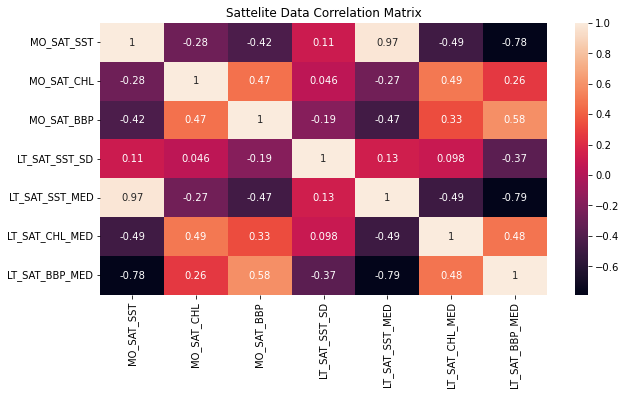

In [10]:
sat_df_vars = sat_df[[
    "MO_SAT_SST",
    "MO_SAT_CHL",
    "MO_SAT_BBP",
    "LT_SAT_SST_SD",
    "LT_SAT_SST_MED",
    "LT_SAT_CHL_MED",
    "LT_SAT_BBP_MED"
]]
fig, ax  = plt.subplots(1,1, figsize=(10,5))
satCorrMatrix = sat_df_vars.corr()
ax.set_title("Sattelite Data Correlation Matrix")
sns.heatmap(satCorrMatrix, annot=True)
plt.show()


Lets merge the two dfs based on float number and cycle and then see the connection between the variables


In [11]:
merged_df = sat_df.merge(prof_df, on=["float", "cycleNumber"], how='inner')

In [12]:
merged_df.head()

,float,cycleNumber,SAT_date,latitude,longitude,elevation,MO_SAT_SST,MO_SAT_CHL,MO_SAT_BBP,LT_SAT_SST_SD,...,LT_SAT_CHL_SD,LT_SAT_CHL_MED,LT_SAT_BBP_SD,LT_SAT_BBP_MED,PROF_date,PRES,PSAL,TEMP,BBP700,CHLA
0,1902303,1,2021-05-06 02:03:16,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,2.156995,...,0.253809,0.401662,0.000819,0.002213,2021-05-06 02:03:16,3,35.539001,12.378333,0.001788,0.695875
1,1902303,1,2021-05-06 02:03:16,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,2.156995,...,0.253809,0.401662,0.000819,0.002213,2021-05-06 02:03:16,4,35.539001,12.378333,0.001788,0.695875
2,1902303,1,2021-05-06 02:03:16,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,2.156995,...,0.253809,0.401662,0.000819,0.002213,2021-05-06 02:03:16,6,35.539001,12.378667,0.001788,0.696499
3,1902303,1,2021-05-06 02:03:16,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,2.156995,...,0.253809,0.401662,0.000819,0.002213,2021-05-06 02:03:16,8,35.539001,12.379000,0.001789,0.716489
4,1902303,1,2021-05-06 02:03:16,49.236,-14.742,-4539.0,12.451869,0.435093,0.00334,2.156995,...,0.253809,0.401662,0.000819,0.002213,2021-05-06 02:03:16,10,35.539001,12.379000,0.001790,0.715552


In [13]:
print("The merged_df has columns", merged_df.columns.to_list())

The merged_df has columns ['float', 'cycleNumber', 'SAT_date', 'latitude', 'longitude', 'elevation', 'MO_SAT_SST', 'MO_SAT_CHL', 'MO_SAT_BBP', 'LT_SAT_SST_SD', 'LT_SAT_SST_MED', 'LT_SAT_CHL_SD', 'LT_SAT_CHL_MED', 'LT_SAT_BBP_SD', 'LT_SAT_BBP_MED', 'PROF_date', 'PRES', 'PSAL', 'TEMP', 'BBP700', 'CHLA']


Lets see the correlations between the CHLA measurement from the float (specific moment in time) as well as the monthly and LT average measurements of CHLA from sattelate

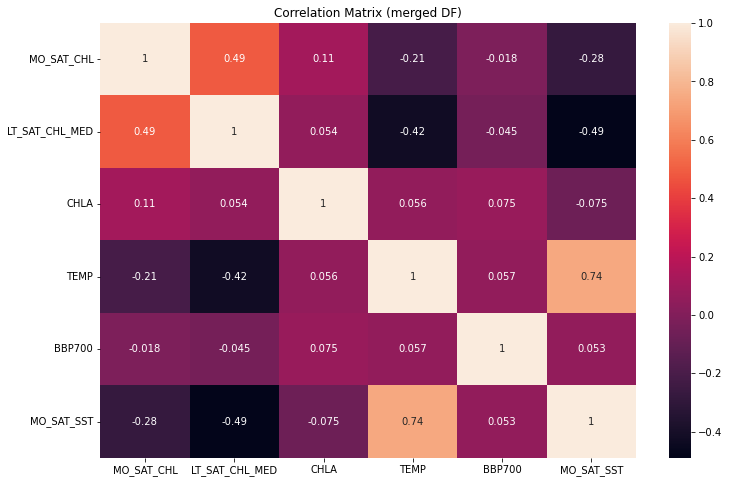

In [14]:
chla_Matrix = merged_df[[
    "MO_SAT_CHL",
    "LT_SAT_CHL_MED",
    "CHLA",
    "TEMP",
    "BBP700",
    "MO_SAT_SST",
]]

fig, ax  = plt.subplots(1,1, figsize=(12,8))
chlaCorrMatrix = chla_Matrix.corr()
ax.set_title("Correlation Matrix (merged DF)")
sns.heatmap(chlaCorrMatrix, annot=True)
plt.show()

In [49]:
month_dict = {
    '01': 'Jan',
    '02': 'Feb',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec' 
}

In [50]:
for i in sat_df.index:
    date = sat_df.loc[i, 'SAT_date']
    month = date[5:7]
    sat_df.at[i, "month"] = month_dict.get(month)
    


Lets look at the correlation between CHLA and seasonality, meaured by month (split by north and south hemispheres)

In [51]:
north = sat_df[sat_df["latitude"]>0]
south =  sat_df[sat_df["latitude"]<0]
print(f"North has {north.shape[0]} measurements and south has {south.shape[0]}")

North has 34220 measurements and south has 32050


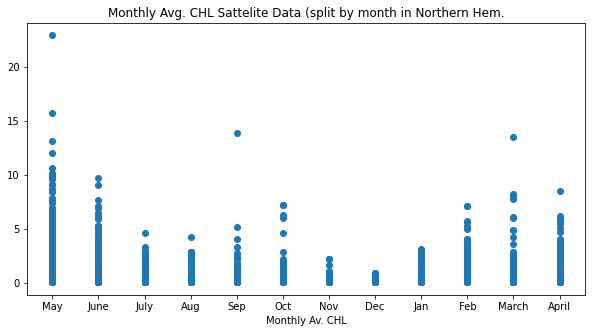

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(x=north["month"], y=north["MO_SAT_CHL"])
plt.title("Monthly Avg. CHL Sattelite Data (split by month in Northern Hem.")
plt.xlabel("Monthly Av. CHL")
plt.show()



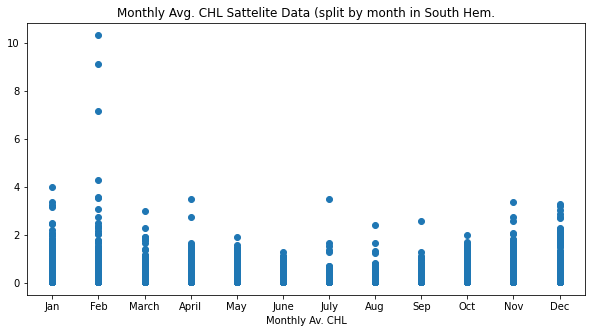

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(x=south["month"], y=south["MO_SAT_CHL"])
plt.title("Monthly Avg. CHL Sattelite Data (split by month in South Hem.")
plt.xlabel("Monthly Av. CHL")
plt.show()
